In [2]:
import numpy as np
from scipy.stats import kstest, norm
import matplotlib.pyplot as plt

Temperature Data: [15 17 16 14 18 20 19 15 21 22]
Mean = 17.70, Standard Deviation = 2.75
Test decision (h): 0
p-value: 0.9792
KS statistic: 0.1368


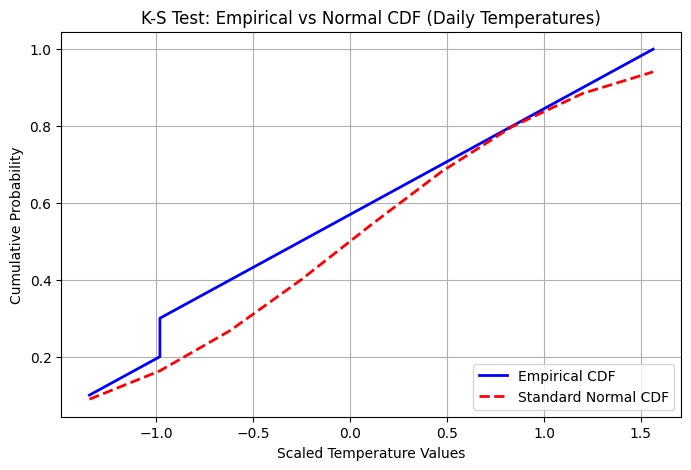

In [3]:
temperature_data = np.array([15, 17, 16, 14, 18, 20, 19, 15, 21, 22])
print("Temperature Data:", temperature_data)

mean_val = np.mean(temperature_data)
std_dev = np.std(temperature_data, ddof=1)
print(f"Mean = {mean_val:.2f}, Standard Deviation = {std_dev:.2f}")

scaled_data = (temperature_data - mean_val) / std_dev

ks_result = kstest(scaled_data, 'norm')

print(f"Test decision (h): {int(ks_result.pvalue < 0.05)}")
print(f"p-value: {ks_result.pvalue:.4f}")
print(f"KS statistic: {ks_result.statistic:.4f}")

sorted_data = np.sort(scaled_data)
ecdf_y = np.arange(1, len(scaled_data)+1) / len(scaled_data)

normal_cdf = norm.cdf(sorted_data)

plt.figure(figsize=(8, 5))
plt.plot(sorted_data, ecdf_y, label='Empirical CDF', color='blue', linewidth=2)
plt.plot(sorted_data, normal_cdf, label='Standard Normal CDF', color='red', linestyle='--', linewidth=2)
plt.title("K-S Test: Empirical vs Normal CDF (Daily Temperatures)")
plt.xlabel("Scaled Temperature Values")
plt.ylabel("Cumulative Probability")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()